# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# Mount the Google Colab drive to read the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the data
df = pd.read_csv('/content/drive/My Drive/AI_ML Studies/Project Submissions/Project1_FoodHub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

*The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.*

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# df.shape provides the no. of rows and columns in the data
df.shape

(1898, 9)

#### Observations:
*- The Dataset has 1898 rows and 9 columns*

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   *We observe that there are 4 integer type columns (2 of these are time data in the integer format), 1 float type column and 4 object type columns*
*   *All columns have 1898 non-null values which means that there are no null values in the data set*


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
# code to check missing values:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


*   *As seen based on the above code, there are no missing values in the data set*




### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [8]:
# code to view summary statistics:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:

*   *Minimum time to prepare food once order is placed is 20 mins*
*   *Average time to prepare food once order is placed is 27.371 mins*
*   *Maximum time to prepare food once order is placed is 35 mins*



### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
# code to find how many order are not rated:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
*   *We observe that of the 1898 orders, 736 orders have not been given ratings*





### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### *Lets explore the numerical variables to begin with:*

Observations on cost of the order:

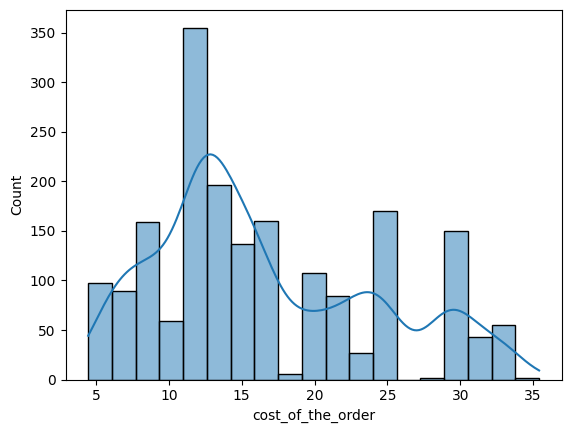

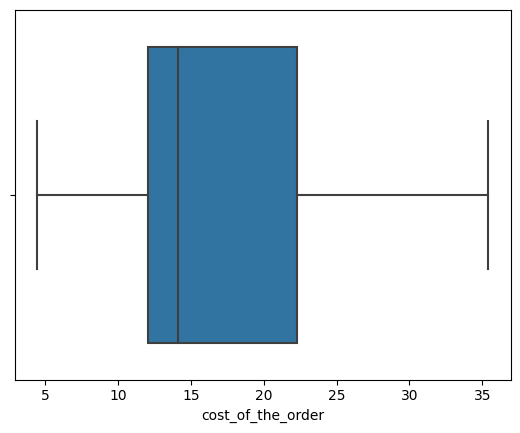

In [10]:
sns.histplot(data=df,x='cost_of_the_order',kde=True)
plt.show()

sns.boxplot(data = df, x='cost_of_the_order')
plt.show()



*   *Median of the cost of order is ~14 dollars. However the cost of orders parameter is skewed to the right with smaller peaks occuring at 24 dollars and 30 dollars.*
*   *50% of the orders are between 12 dollars to 22 dollars*
*   *There are no outliers present in the parameter*




Observations on food preparation time:


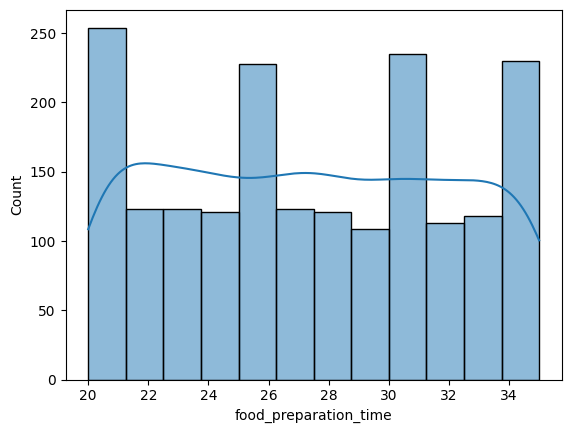

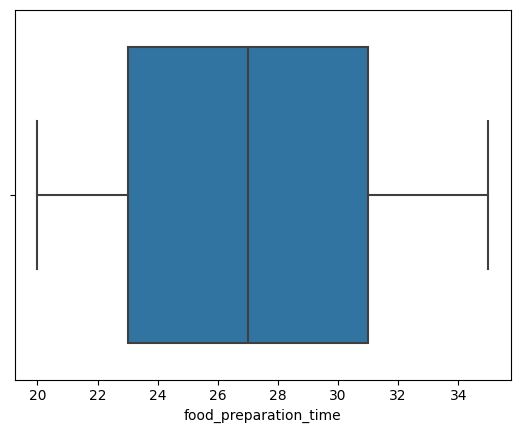

In [11]:
sns.histplot(data=df,x='food_preparation_time',kde=True)
plt.show()

sns.boxplot(data = df, x='food_preparation_time')
plt.show()


*   *Median of the food prep time is 27 mins as seen in descriptive statistics aswell.*
*   *Food prep time is between 23 to 31 mins in 50% of the instances*
*   *There are no outliers present in the parameter*


Observation on delivery time:

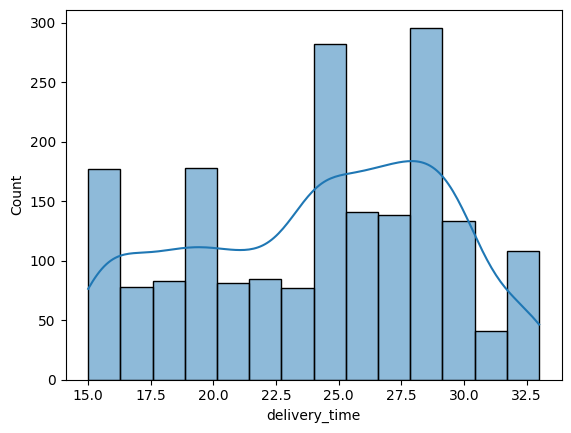

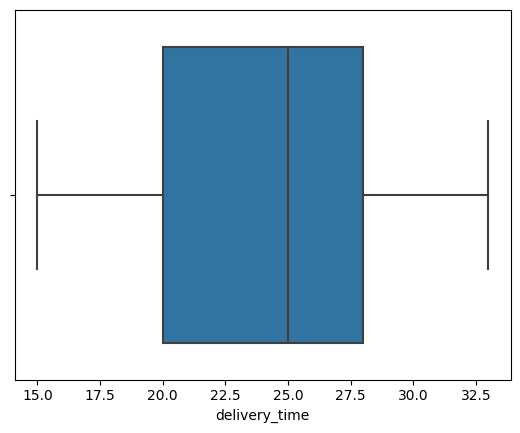

In [12]:
sns.histplot(data=df,x='delivery_time',kde=True)
plt.show()

sns.boxplot(data = df, x='delivery_time')
plt.show()

*   Median of the delivery time is 25 mins.
*   It is skewed to the left.
*   50% of the orders are delivered between 20 to 28 mins of delivery time.
*   There are no outliers present in the parameter*

#### *We will now explore the categorical variables:*

Observations on ratings:

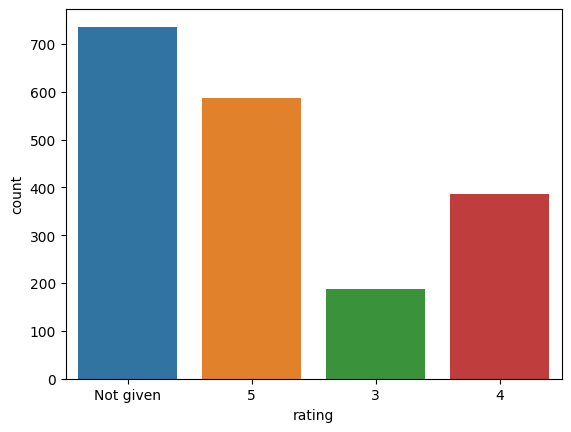

Not given    38.777661
5            30.979979
4            20.337197
3             9.905163
Name: rating, dtype: float64

In [13]:
sns.countplot(data=df,x='rating')
plt.show();
df['rating'].value_counts(normalize=True)*100

* *Ratings 'not given' is the highest number of data points for this parameter*

* *Of the ratings that are given, rating 5 followed by rating 4 are the highest values*

* *There are no ratings given below rating-3*

Obervations on day_of_the_week:


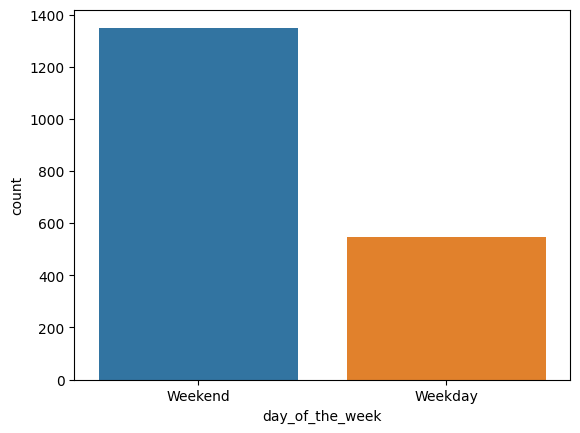

Weekend    71.18019
Weekday    28.81981
Name: day_of_the_week, dtype: float64

In [14]:
sns.countplot(data=df,x='day_of_the_week')
plt.show()
df['day_of_the_week'].value_counts(normalize=True)*100

* * 70% plus of all orders are placed and delivered on the weekends*

Observations on cuisine_type:


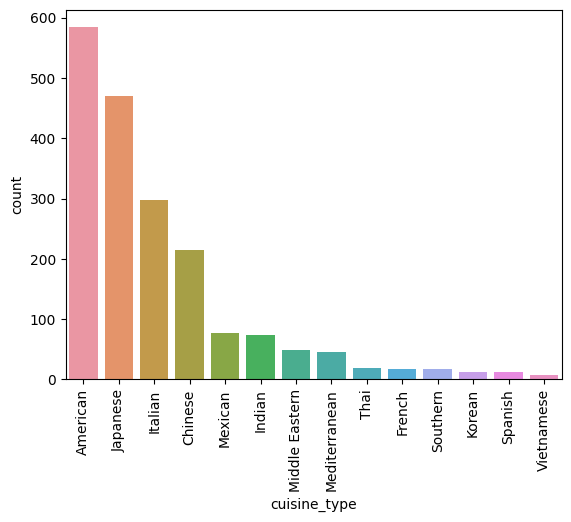

American          30.769231
Japanese          24.762908
Italian           15.700738
Chinese           11.327713
Mexican            4.056902
Indian             3.846154
Middle Eastern     2.581665
Mediterranean      2.423604
Thai               1.001054
French             0.948367
Southern           0.895680
Korean             0.684932
Spanish            0.632244
Vietnamese         0.368809
Name: cuisine_type, dtype: float64

In [15]:
sns.countplot(data=df,x='cuisine_type',order=df['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()
df['cuisine_type'].value_counts(normalize=True)*100

* *American cuisine is the highest ordered cuisine across cuisines*
* *Top 4 cuisines ie American, Japanese, Italian and Chinese form 80% plus of all the cuisines ordered*


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [16]:
# Following gives the list of top 5 restaurants alongside with the no. of orders they have received
print(df['restaurant_name'].value_counts(sort=True,ascending=False).head(5))

# also below code-line prints the % of orders the top 5 have received along with the total sum of the percentage of orderes the top 5 have collectively garnered
df_Top5_percent_of_orders=df['restaurant_name'].value_counts(normalize=True,sort=True,ascending=False).head(5)*100

print('\n\n',df_Top5_percent_of_orders,'\n Percentage share of orders by top 5',sum(df_Top5_percent_of_orders.values))

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


 Shake Shack                  11.538462
The Meatball Shop             6.954689
Blue Ribbon Sushi             6.269758
Blue Ribbon Fried Chicken     5.057956
Parm                          3.582719
Name: restaurant_name, dtype: float64 
 Percentage share of orders by top 5 33.40358271865121


#### Observations:
* *The top 5 restaurants in terms of no. of orders received are are listed above*
* *Together they contribute to ~33.4%% share of all orders received across all restaurants*


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

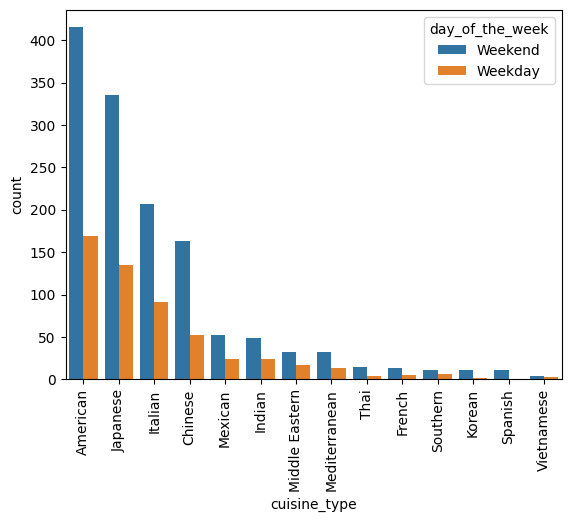

In [17]:
sns.countplot(data=df,x='cuisine_type',order=df['cuisine_type'].value_counts().index,hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show();

#### Observations:
* *American cuisine is the most popular cuisine on the weekend*
* *American cuisine is infact the most popular cuisine on weekdays aswell*

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [18]:
#First get the total no. of orders which have cost more than 20 dollars
orders_more_than_20d= df[df['cost_of_the_order']>20].shape[0]
# divide the above by total number of orders to get percent of orders that cost more than 20 dollars
print('Percetage of orders costing more than 20 dollars:',orders_more_than_20d * 100 /df.shape[0],'%')

Percetage of orders costing more than 20 dollars: 29.24130663856691 %


#### Observations:
* *Percetage of orders costing more than 20 dollars: 29.24%*

### **Question 10**: What is the mean order delivery time? [1 mark]

In [28]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
* *Mean order delivery time is: 24.16 mins*

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [20]:
#Group the data based on customer id and then sort the series retured by size() in descending order:
df.groupby('customer_id').size().sort_values(ascending=False).head(3)


customer_id
52832    13
47440    10
83287     9
dtype: int64

#### Observations:
* *The top 3 most frequent customers (in order of highest to lowest) are with ID numbers: '52832' , '47440' , '83287'.*
* *They have placed 13, 10 and 9 orders respectively.*

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


> **Lets get a correlation between the numerical parameters to understand the various relationships**


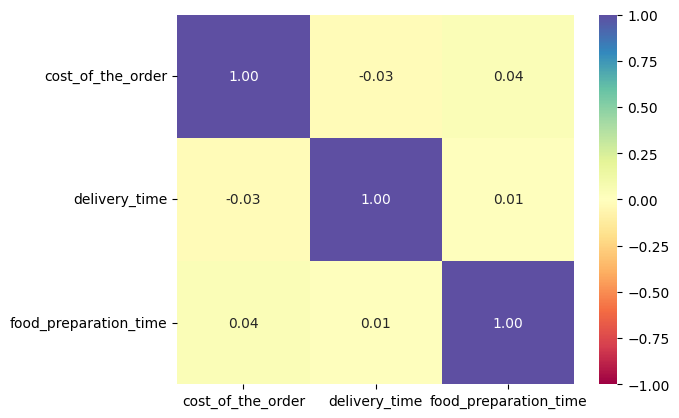

In [29]:
#create an array of nmerical variables and pass it to heatmap to generate a correlation matrix
numerical_vars = ['cost_of_the_order','delivery_time','food_preparation_time']
sns.heatmap(df[numerical_vars].corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral",fmt=".2f",);

Observation:
* *We see that there is no strong corelation between the numerical parameters*

> **We will now study the correlation between category columns and numerical parameters.**

>

####**1**. **Cuisine and Cost of order**

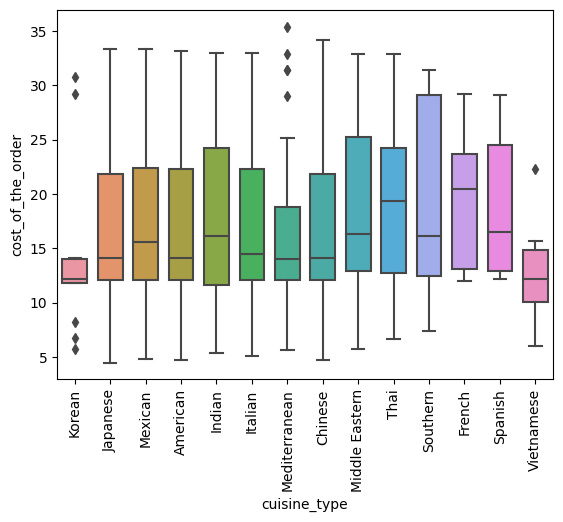

<Figure size 2200x1000 with 0 Axes>


Korean cuisine median: 12.18

Vietnamese cuisine median: 12.13

French cuisine median: 20.47

Thai cuisine median: 19.35

Overall median: 14.14


In [49]:
#Cuisine and Cost of order
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order',width=0.7)
plt.xticks(rotation=90)
plt.figure(figsize=(22,10))
plt.show();
# given Korean and vietnamese have lowest medians, get their median values
print('\nKorean cuisine median:',df[df['cuisine_type']== 'Korean'].cost_of_the_order.median())
print('\nVietnamese cuisine median:',df[df['cuisine_type']== 'Vietnamese'].cost_of_the_order.median())

# given Thai and French have highest medians, get their median values
print('\nFrench cuisine median:',df[df['cuisine_type']== 'French'].cost_of_the_order.median())
print('\nThai cuisine median:',df[df['cuisine_type']== 'Thai'].cost_of_the_order.median())

print('\nOverall median:',df['cost_of_the_order'].median())

Observations:
* *French followed by Thai has the highest median wrt the cost of order*
* *Korean and vietnamese have the lowest median wrt the cost of order*
* *Korean, Mediterranean and Vietnamese have outliers wrt cost of orders*
* *Southern cuisine has the highest interquartile range ie 50% of its data has the widest range in terms of cost of the order*

####**2**. **Cuisine and Food Preperation time**

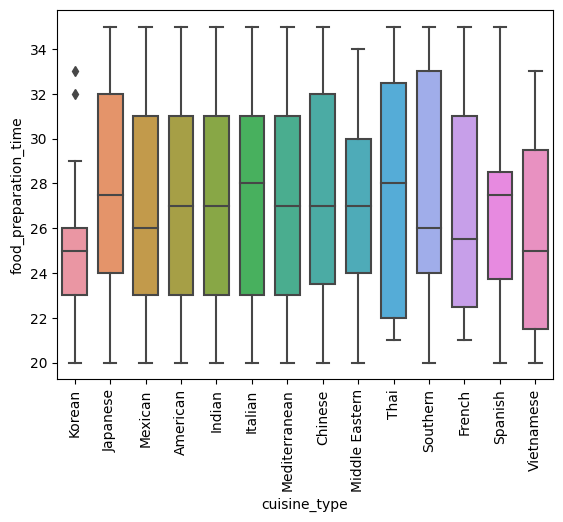

<Figure size 2200x1000 with 0 Axes>

In [53]:
#Cuisine and preparation time
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time',width=0.7)
plt.xticks(rotation=90)
plt.figure(figsize=(22,10))
plt.show();

Observations:
* *Italian followed by Thai have the highest median wrt the food preparation time*
* *Korean and vietnamese have the lowest median wrt food preparation time*
* *Korean cuisine has  outliers wrt food preparation time*

#### **3. Day of the week vs preparation time

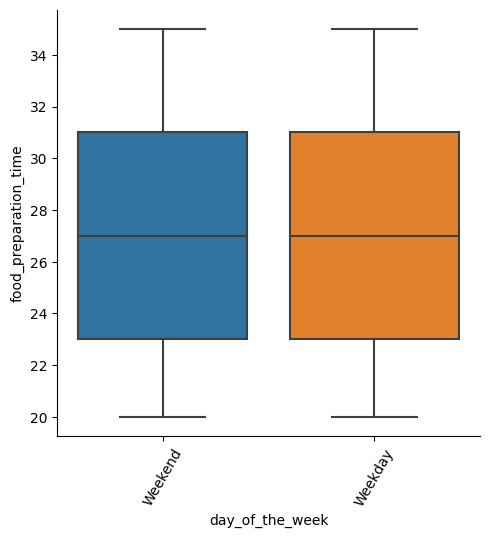

In [59]:
sns.catplot(data=df,x='day_of_the_week',y='food_preparation_time',kind='box')
plt.xticks(rotation = 60)
plt.show();

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [22]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [23]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [24]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [25]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---